# Project _Kaudruck_ - Force correction model

### Setup

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.cm as cmap
import numpy as np
from skimage import io
import pandas as pd

In [3]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['legend.fontsize'] = "large"

In [4]:
src_dir = os.path.abspath(os.path.join(os.pardir, 'src'))
sys.path.append(src_dir)

In [5]:
from kaudruck import KauDruck, plot_aoi_aor

## Kugeldurchmesser 6.5 [mm]

In [6]:
d65 = pd.read_excel('../data/empirical/Serie1_6,5_4mmKugel_13032019_Rohdaten.xlsx', skipfooter=10)
d65 

,Kugeldurchmesser [mm],F [N]/ZWICK,F [N]/Python,Fläche (Pixel),Farbgewicht,Gewicht/Fläche,"Fläche (mm, korrigiert)",Druck [Mpa]
0,6.5,2,2.40,30,10,0.321,0.03,79.49
1,NaN,5,9.42,104,38,0.364,0.10,90.00
2,NaN,10,18.89,193,76,0.393,0.19,97.29
3,NaN,20,30.58,296,123,0.415,0.30,102.71
4,NaN,30,36.01,342,145,0.423,0.34,104.68
5,NaN,40,45.30,428,182,0.425,0.43,105.22
6,NaN,50,50.00,465,201,0.432,0.47,106.89
7,NaN,60,54.70,505,220,0.435,0.51,107.68
8,NaN,70,59.20,542,238,0.439,0.55,108.58
9,NaN,80,63.00,572,253,0.443,0.58,109.49


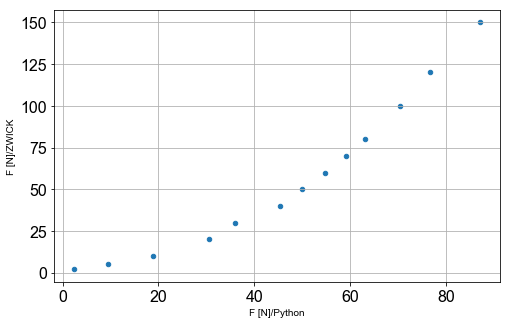

In [7]:
fig, ax = plt.subplots(figsize=(8,5))
d65.plot.scatter(y='F [N]/ZWICK', x='F [N]/Python', ax=ax)
ax.grid()

### Fit a quadratic model

In [8]:
x=d65['F [N]/Python'].values
y=d65['F [N]/ZWICK'].values

In [9]:
z = np.polyfit(x, y, 2)
p = np.poly1d(z)
x_new = np.linspace(0,100,200)

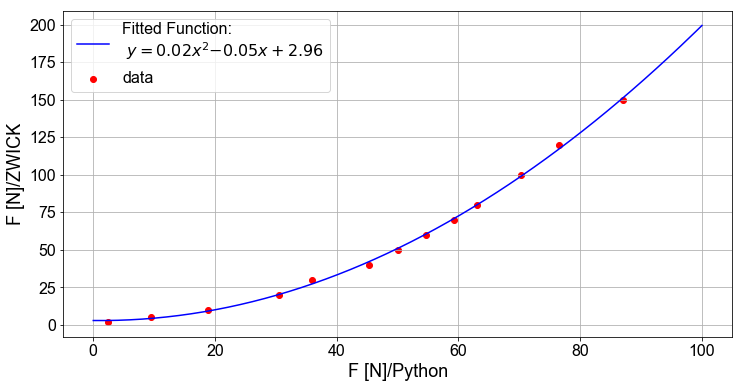

In [10]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(x=x, 
           y=y,
           marker='o', color="r", label="data")
ax.plot(x_new, p(x_new), color="blue",
        label='Fitted Function:\n $y = %0.2fx^{2}  {%0.2f x} + %0.2f$' % (z[0],z[1],z[2]))
ax.grid()
ax.set_ylabel('F [N]/ZWICK', size=18)
ax.set_xlabel('F [N]/Python', size=18)
ax.legend(fontsize=16);

## Kugeldurchmesser 4.0 [mm]

In [11]:
d40 = pd.read_excel('../data/empirical/Serie1_6,5_4mmKugel_13032019_Rohdaten.xlsx', 
                    skiprows=list(range(1,15)))
d40 

,Kugeldurchmesser [mm],F [N]/ZWICK,F [N]/Python,Fläche (Pixel),Farbgewicht,Gewicht/Fläche,"Fläche (mm, korrigiert)",Druck [Mpa]
0,4.0,2,3.12,29,10,0.330,0.03,106.90
1,NaN,5,12.27,100,38,0.376,0.10,121.98
2,NaN,10,20.69,161,63,0.394,0.16,127.75
3,NaN,20,31.72,240,97,0.405,0.24,131.39
4,NaN,30,38.93,287,119,0.416,0.29,134.83
5,NaN,40,44.55,321,137,0.425,0.32,137.96
6,NaN,50,50.00,357,153,0.429,0.36,139.23
7,NaN,60,53.02,367,163,0.443,0.37,143.61
8,NaN,70,57.96,403,178,0.441,0.41,142.96


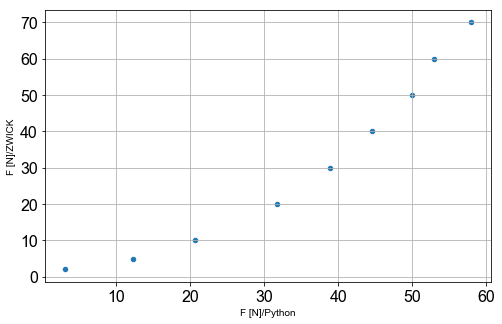

In [12]:
fig, ax = plt.subplots(figsize=(8,5))
d40.plot.scatter(y='F [N]/ZWICK', x='F [N]/Python', ax=ax)
ax.grid()

### Fit a quadratic model

In [13]:
x=d40['F [N]/Python'].values
y=d40['F [N]/ZWICK'].values

In [14]:
z = np.polyfit(x, y, 2)
p = np.poly1d(z)
x_new = np.linspace(0,100,200)

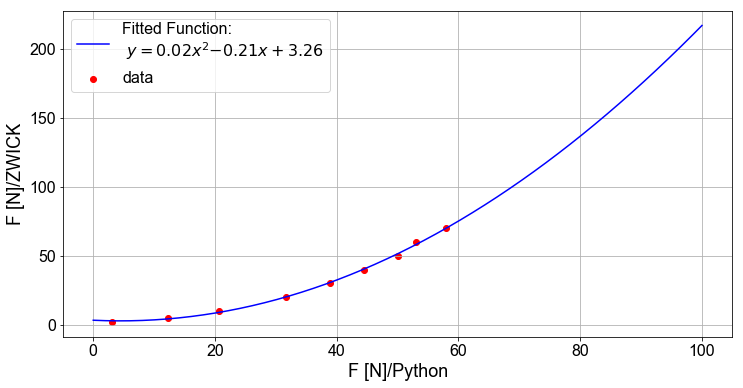

In [15]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(x=x, 
           y=y,
           marker='o', color="r", label="data")
ax.plot(x_new, p(x_new), color="blue",
        label='Fitted Function:\n $y = %0.2fx^{2}  {%0.2f x} + %0.2f$' % (z[0],z[1],z[2]))
ax.grid()
ax.set_ylabel('F [N]/ZWICK', size=18)
ax.set_xlabel('F [N]/Python', size=18)
ax.legend(fontsize=16);

## Joint plot

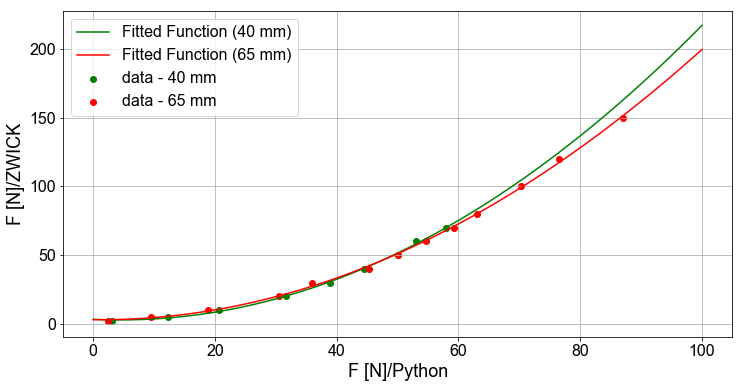

In [22]:
x_new = np.linspace(0,100,200)
fig, ax = plt.subplots(figsize=(12,6))

x=d40['F [N]/Python'].values
y=d40['F [N]/ZWICK'].values
z = np.polyfit(x, y, 2)
p40 = np.poly1d(z)

ax.scatter(x=x, 
           y=y,
           marker='o', color="green", label="data - 40 mm")

x=d65['F [N]/Python'].values
y=d65['F [N]/ZWICK'].values
z = np.polyfit(x, y, 2)
p65 = np.poly1d(z)

ax.scatter(x=x, 
           y=y,
           marker='o', color="r", label="data - 65 mm")

ax.plot(x_new, p40(x_new), color="green",
        label='Fitted Function (40 mm)')

ax.plot(x_new, p65(x_new), color="r",
        label='Fitted Function (65 mm)')

ax.grid()
ax.set_ylabel('F [N]/ZWICK', size=18)
ax.set_xlabel('F [N]/Python', size=18)
ax.legend(fontsize=16);

### Joint model

In [17]:
x= np.hstack([d65['F [N]/Python'].values, d40['F [N]/Python'].values])
y= np.hstack([d65['F [N]/ZWICK'].values, d40['F [N]/ZWICK'].values])

In [18]:
z = np.polyfit(x, y, 2)
p = np.poly1d(z)
x_new = np.linspace(0,100,200)

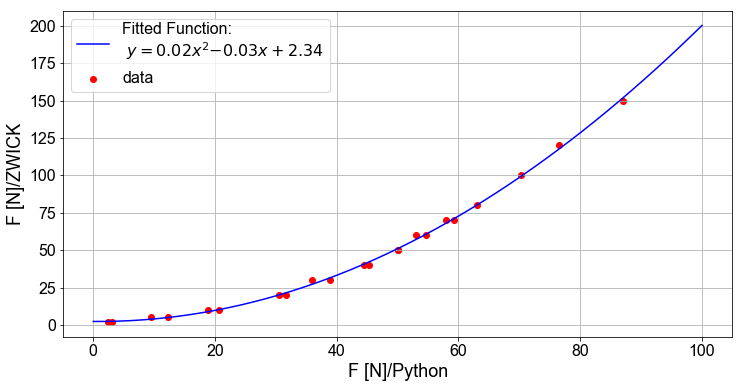

In [19]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(x=x, 
           y=y,
           marker='o', color="r", label="data")
ax.plot(x_new, p(x_new), color="blue",
        label='Fitted Function:\n $y = %0.2fx^{2}  {%0.2f x} + %0.2f$' % (z[0],z[1],z[2]))
ax.grid()
ax.set_ylabel('F [N]/ZWICK', size=18)
ax.set_xlabel('F [N]/Python', size=18)
ax.legend(fontsize=16);

### Save model for further usage

In [20]:
import json
with open('../models/force_correction.json', 'w') as f:
    json.dump({'x_computed':x.tolist(), 'y_measured':y.tolist()}, f)

In [21]:
(x,y)

(array([ 2.4 ,  9.42, 18.89, 30.58, 36.01, 45.3 , 50.  , 54.7 , 59.2 ,
        63.  , 70.31, 76.55, 87.06,  3.12, 12.27, 20.69, 31.72, 38.93,
        44.55, 50.  , 53.02, 57.96]),
 array([  2,   5,  10,  20,  30,  40,  50,  60,  70,  80, 100, 120, 150,
          2,   5,  10,  20,  30,  40,  50,  60,  70]))